In [2]:
import pandas as pd
import numpy as np

# Real-world Data Cleaning Example

### NYC buildings - Load and clean a noisy dataset

#### 1 Read data from files

In [3]:
# Create a dataframe using read_csv()

#filename = 'pluto_shorter.csv'
url = 'pluto_shorter.csv'

df = pd.read_csv(url)
print('loaded csv with {} rows and {} columns'.format(df.shape[0], df.shape[1]))

loaded csv with 42950 rows and 97 columns


/var/folders/0r/tsslvr091hx5wmgbcymx__vh0000gn/T/ipykernel_59139/4104957564.py:6: DtypeWarning: Columns (18,19,21,23,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [4]:
# Inspect the dataframe (it may be messy)

df.head()

,Unnamed: 0,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,...,firm07_flag,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate
0,0,BX,5641.0,670.0,210.0,516.00,2.0,NaN,13.0,NaN,...,1.0,1.0,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
1,20,QN,4671.0,39.0,407.0,1039.00,2011.0,25.0,19.0,11357.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
2,40,BK,3925.0,32.0,305.0,1172.02,2004.0,19.0,37.0,11208.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
3,60,MN,1836.0,19.0,107.0,189.00,2002.0,3.0,7.0,10025.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018
4,80,QN,8898.0,16.0,409.0,4.00,2001.0,27.0,30.0,11421.0,...,NaN,NaN,12/6/2018,12/20/2018,12/21/2018,12/20/2018,12/21/2018,NaN,NaN,12/20/2018


#### 2 Clean dataset
Also known as 'data wrangling/munging'

In [5]:
# List the columns and select some

df.columns

my_cols = ['borough','numfloors','yearbuilt', 'landuse', 'zipcode', 'unitstotal', 'assesstot']
df = df[my_cols]

In [6]:
# Rename columns

df.columns

df.rename(columns = {'zipcode': 'zip', 'yearbuilt': 'year_built', 'unitstotal': 'housing_units', 'assesstotal': 'assessed_value_USD'},
         inplace = True)

<AxesSubplot:>

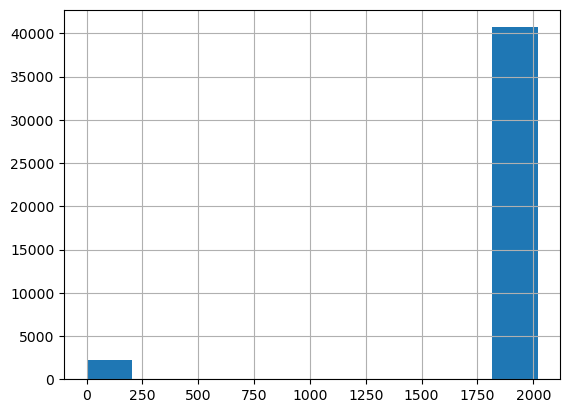

In [7]:
# Check distribution of year_built. Any problem?

df.year_built.hist()

/var/folders/0r/tsslvr091hx5wmgbcymx__vh0000gn/T/ipykernel_59139/532146976.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.year_built[df.year_built < 1000] = np.nan


<AxesSubplot:>

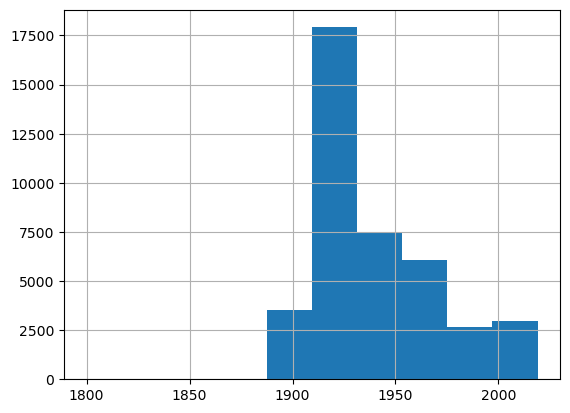

In [8]:
# Presumably few NYC buildings were constructed during the early days of the Roman Empire.
# Set year_built to np.nan for such values.

df.year_built[df.year_built < 1000] = np.nan
df.year_built.hist()

In [9]:
# How many missing values do the _____ have? (columns or rows?)
# We could drop rows with missing values, or impute them based on mean, median or another strategy.

df.isnull().sum()

borough             0
numfloors          30
year_built       2244
landuse           134
zip              1050
housing_units      20
assesstot          20
dtype: int64

In [10]:
print('original shape: ', df.shape)
df.dropna(inplace=True)
print('new shape: ', df.shape)

original shape:  (42950, 7)
new shape:  (40644, 7)


#### 3 Compute summary statistics

In [11]:
# Use methods like max, min and mean() on a column

print("Max floors: ", df.numfloors.max())
print("Mean assessed value: {:.0f}".format(df.assesstot.mean()))

Max floors:  58.0
Mean assessed value: 441861


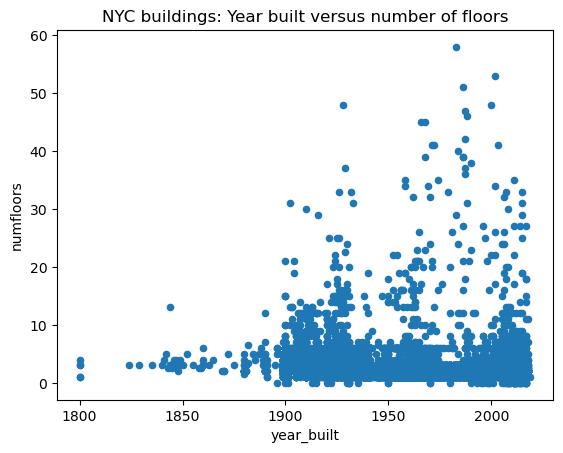

In [12]:
# Use plotting to explore relationships in the data

df.plot(x = 'year_built', y = 'numfloors', kind = 'scatter', title = 'NYC buildings: Year built versus number of floors');

#### 4 Challenges

__Exercise 1: Building numbers and values__
    
* Count how many buildings there are in Manhattan, Brooklyn and Queens.
* Find the mean building price in these boroughs. Does it differ?

In [13]:
# YOUR CODE HERE

# feb 16, 2023
df.groupby('borough').agg({'housing_units': 'count'})


,housing_units
borough,
BK,13295
BX,4208
MN,2036
QN,15465
SI,5640


__Exercise 2: When were the Five Boroughs built?__
    
* Plot scatter charts of each borough, showing number of floors vs. year built
* Package this as a function. The function should take one parameter: borough.

In [15]:
# YOUR CODE HERE
def plot(b):
    df_b = df.loc[df.borough == b]
    df_b.plot(x='year_built', y='numFloors')
#     df_b.plot(x='year_built', y='numFloors', kind='scatter', title='NYC buildings: Year built vs. number of floors')
    
    
for borough in ['BK', 'BX', 'MN', 'QN', "SI"]:
    plot(borough)

KeyError: 'numFloors'